# Relatório de Análise VII

## Criando Agrupamentos

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('dados/base_tratada_2.csv', sep = ';')
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo_Casa,Tipo_Apartamento
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,False,True
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,True,False
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,False,True
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,False,True
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
22257,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,False,True
22258,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,False,True
22259,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,False,True
22260,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,False,True


In [3]:
dados['Valor'].mean()

5006.684574611446

In [4]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados_bairros = dados[selecao]
dados_bairros

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,Tipo_Casa,Tipo_Apartamento
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,False,True
7,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,False,True
8,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,False,True
9,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,False,True
10,Flat,Botafogo,3,1,1,80,3800.0,1040.0,0.0,47.50,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
22252,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0,37.50,False,True
22253,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,100.00,False,True
22254,Apartamento,Tijuca,1,0,0,28,1000.0,360.0,25.0,35.71,False,True
22256,Casa de Condomínio,Barra da Tijuca,5,3,4,450,15000.0,1711.0,2332.0,33.33,True,False


In [5]:
dados_bairros['Bairro'].drop_duplicates()

0          Copacabana
10           Botafogo
12    Barra da Tijuca
13             Tijuca
17             Leblon
18            Ipanema
77           Flamengo
Name: Bairro, dtype: object

In [6]:
grupo_bairro = dados_bairros.groupby('Bairro')
grupo_bairro

In [7]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [8]:
grupo_bairro.groups

{'Barra da Tijuca': [12, 14, 20, 29, 31, 34, 41, 42, 59, 60, 63, 67, 73, 78, 92, 106, 109, 111, 116, 129, 131, 135, 151, 154, 156, 166, 167, 174, 187, 190, 209, 216, 223, 226, 235, 236, 239, 242, 247, 262, 268, 278, 280, 295, 296, 297, 299, 306, 312, 315, 329, 339, 340, 349, 364, 370, 372, 378, 384, 391, 393, 404, 416, 436, 437, 439, 440, 443, 453, 456, 467, 468, 470, 478, 481, 489, 499, 505, 508, 516, 532, 543, 544, 545, 546, 549, 553, 558, 560, 561, 562, 578, 592, 595, 596, 598, 602, 604, 609, 618, ...], 'Botafogo': [10, 22, 47, 86, 87, 110, 118, 126, 133, 198, 202, 227, 338, 366, 419, 420, 455, 503, 529, 531, 551, 601, 656, 692, 726, 764, 773, 794, 832, 837, 871, 929, 938, 942, 1020, 1059, 1097, 1109, 1128, 1133, 1144, 1157, 1182, 1219, 1223, 1224, 1242, 1269, 1302, 1315, 1324, 1337, 1367, 1404, 1437, 1442, 1478, 1541, 1553, 1603, 1655, 1659, 1681, 1697, 1718, 1727, 1769, 1770, 1817, 1845, 1854, 1857, 1884, 1954, 1964, 1990, 2005, 2014, 2022, 2063, 2100, 2103, 2116, 2118, 2119, 2123

In [9]:
for bairro, dados in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [10]:
for bairro, dados in grupo_bairro:
    print(dados)

                     Tipo           Bairro  Quartos  Vagas  Suites  Area  \
12            Apartamento  Barra da Tijuca        2      1       1    67   
14     Casa de Condomínio  Barra da Tijuca        4      3       2   466   
20            Apartamento  Barra da Tijuca        3      3       1   175   
29            Apartamento  Barra da Tijuca        3      1       2    70   
31            Apartamento  Barra da Tijuca        3      2       1   110   
...                   ...              ...      ...    ...     ...   ...   
22237  Casa de Condomínio  Barra da Tijuca        3      5       3  1000   
22247         Apartamento  Barra da Tijuca        2      1       1    85   
22248         Apartamento  Barra da Tijuca        3      2       0    98   
22249         Apartamento  Barra da Tijuca        3      2       2   140   
22256  Casa de Condomínio  Barra da Tijuca        5      3       4   450   

         Valor  Condominio    IPTU  Valor_m2  Tipo_Casa  Tipo_Apartamento  
12      170

In [11]:
for bairro, data in grupo_bairro:
    print(f'O bairro {bairro} tem R$ {data.Valor.mean()} como valor médio de aluguel.')

O bairro Barra da Tijuca tem R$ 6877.691858990616 como valor médio de aluguel.
O bairro Botafogo tem R$ 8502.033953997809 como valor médio de aluguel.
O bairro Copacabana tem R$ 4094.017666543982 como valor médio de aluguel.
O bairro Flamengo tem R$ 4103.390820584144 como valor médio de aluguel.
O bairro Ipanema tem R$ 9170.718015665796 como valor médio de aluguel.
O bairro Leblon tem R$ 8581.582450832073 como valor médio de aluguel.
O bairro Tijuca tem R$ 2043.52 como valor médio de aluguel.


In [12]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,6877.69,3558.01
Botafogo,8502.03,983.92
Copacabana,4094.02,1152.46
Flamengo,4103.39,1099.84
Ipanema,9170.72,2283.87
Leblon,8581.58,2091.95
Tijuca,2043.52,711.69


In [13]:
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])

In [14]:
sexo = alunos.groupby('Sexo')
sexo = pd.DataFrame(sexo['Notas'].mean().round(2))
sexo.columns = ['Notas Médias']
sexo

,Notas Médias
Sexo,
F,5.82
M,7.12


## Estatísticas descritivas

In [15]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,6877.69,3558.01
Botafogo,8502.03,983.92
Copacabana,4094.02,1152.46
Flamengo,4103.39,1099.84
Ipanema,9170.72,2283.87
Leblon,8581.58,2091.95
Tijuca,2043.52,711.69


In [16]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3943.0,6877.69,11692.56,800.0,2500.0,4300.0,8500.0,600000.0
Botafogo,913.0,8502.03,148831.68,700.0,2200.0,3000.0,4300.0,4500000.0
Copacabana,2717.0,4094.02,3572.50,100.0,2000.0,3000.0,4750.0,35000.0
Flamengo,719.0,4103.39,3828.55,800.0,1900.0,2900.0,4900.0,35000.0
Ipanema,1915.0,9170.72,7971.39,1200.0,4400.0,7000.0,10500.0,90000.0
Leblon,1322.0,8581.58,6877.75,100.0,4500.0,6800.0,10000.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [17]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min':'Mínima', 'max':'Máxima', 'sum':'Soma'})

,Mínima,Máxima,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27118739.0
Botafogo,700.0,4500000.0,7762357.0
Copacabana,100.0,35000.0,11123446.0
Flamengo,800.0,35000.0,2950338.0
Ipanema,1200.0,90000.0,17561925.0
Leblon,100.0,100000.0,11344852.0
Tijuca,750.0,45000.0,2247872.0


## Matplotlib

In [18]:
!pip install -U matplotlib

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20, 10))

<Axes: xlabel='Bairro'>

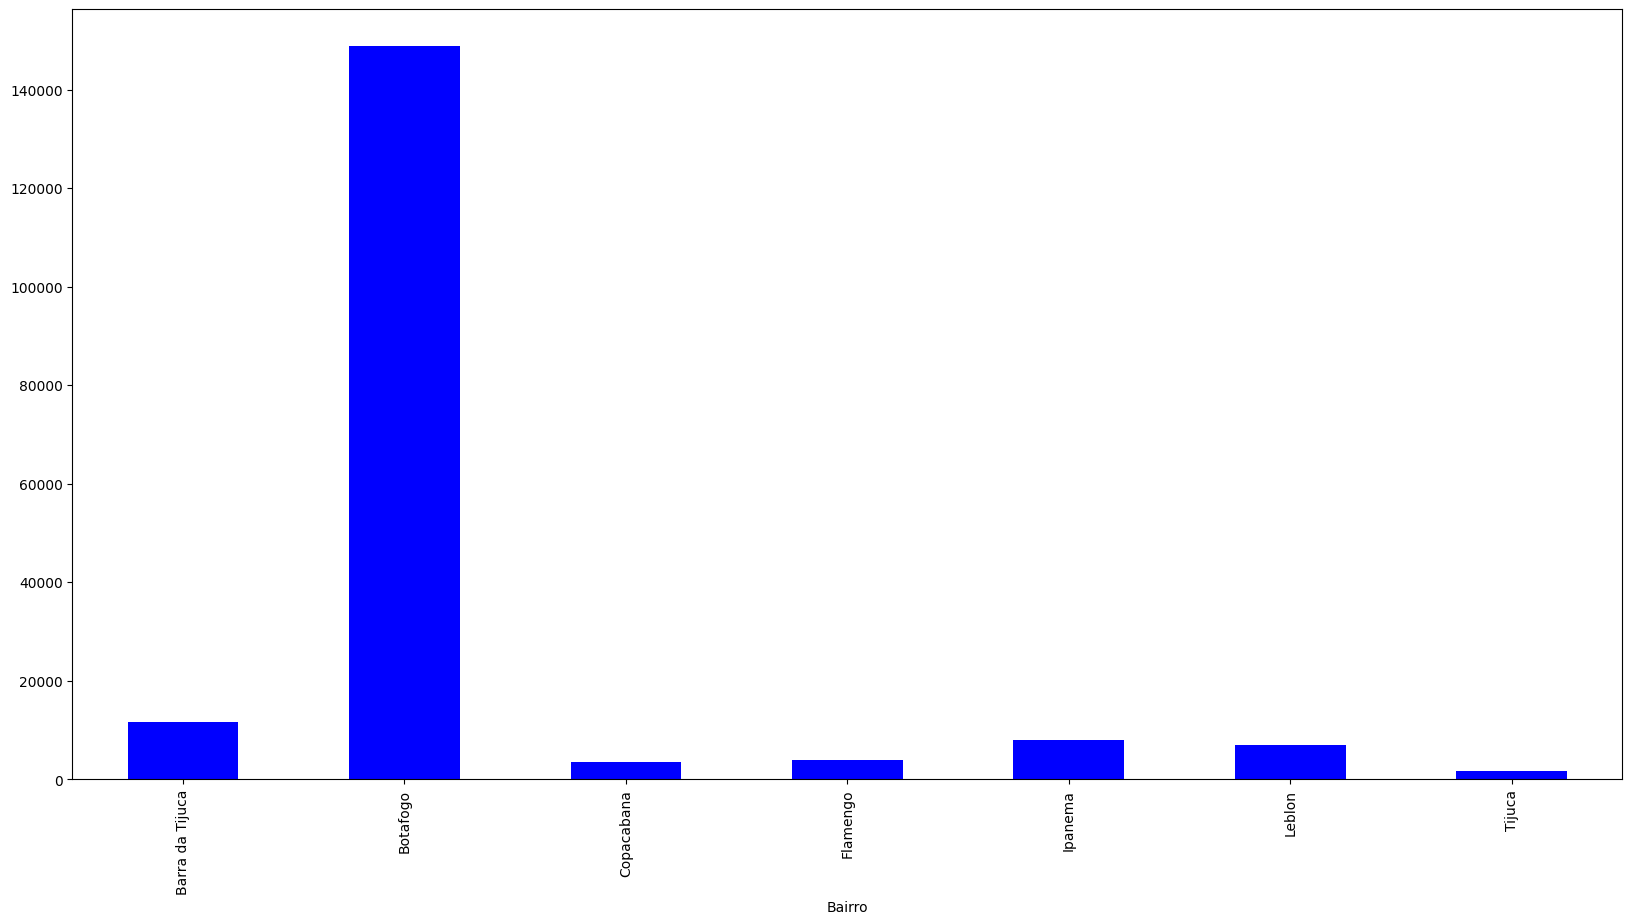

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

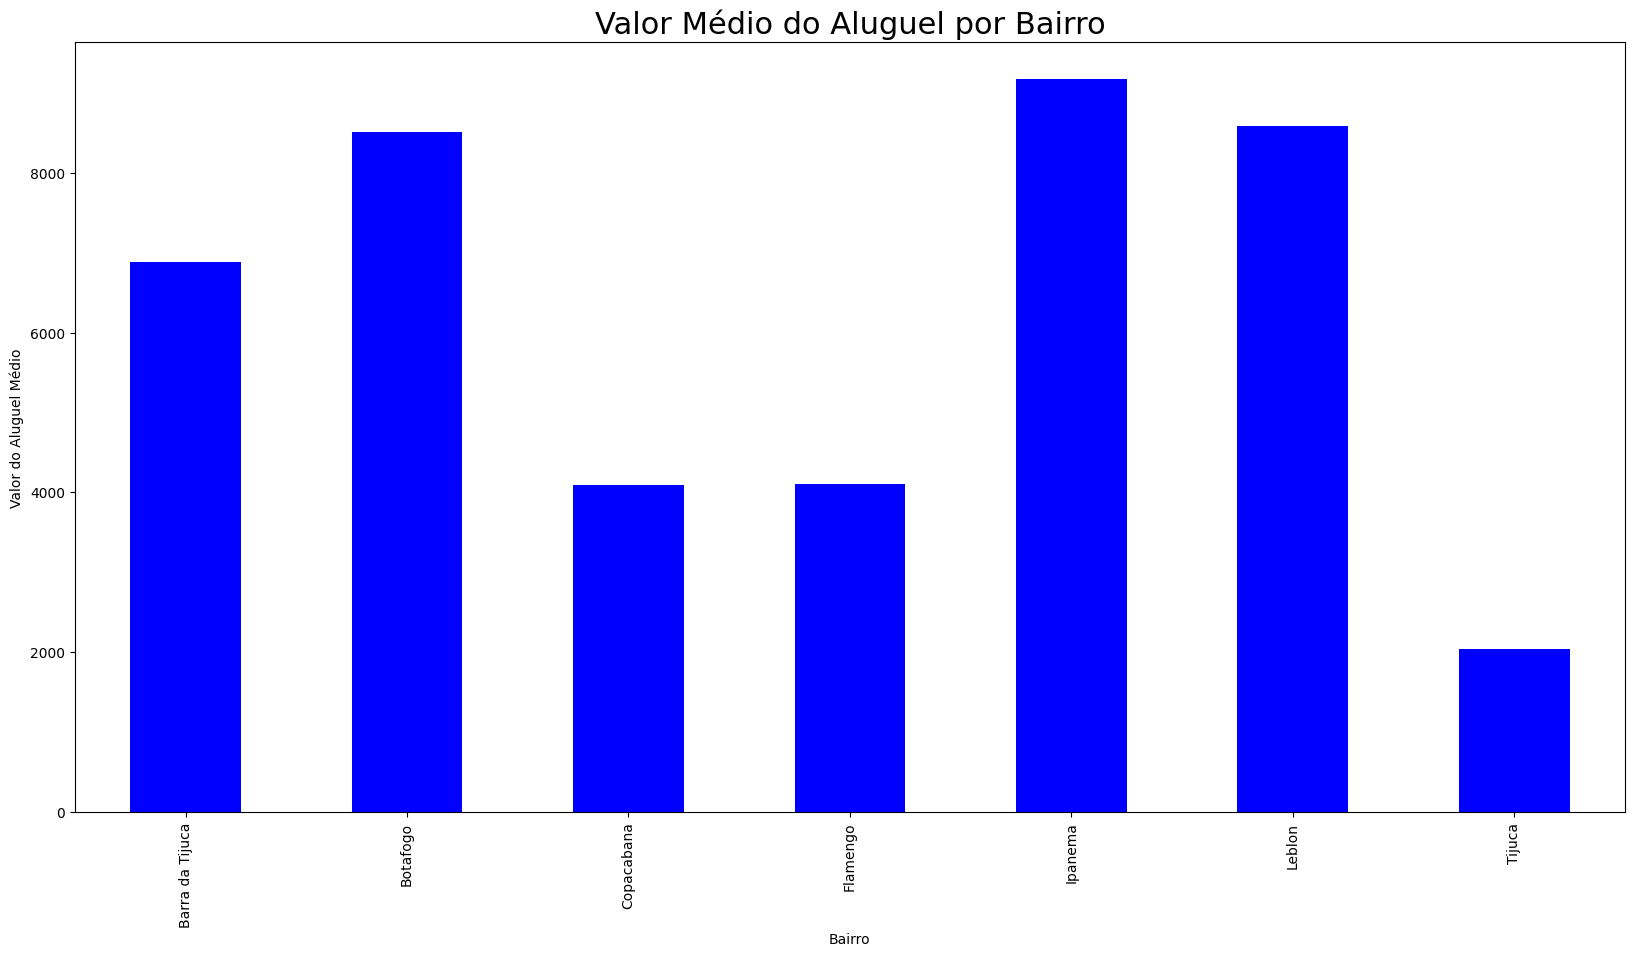

In [24]:
fig_media = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig_media.set_ylabel('Valor do Aluguel Médio')
fig_media.set_title('Valor Médio do Aluguel por Bairro', {'fontsize':22})

Text(0.5, 1.0, 'Valor Máximo do Aluguel por Bairro')

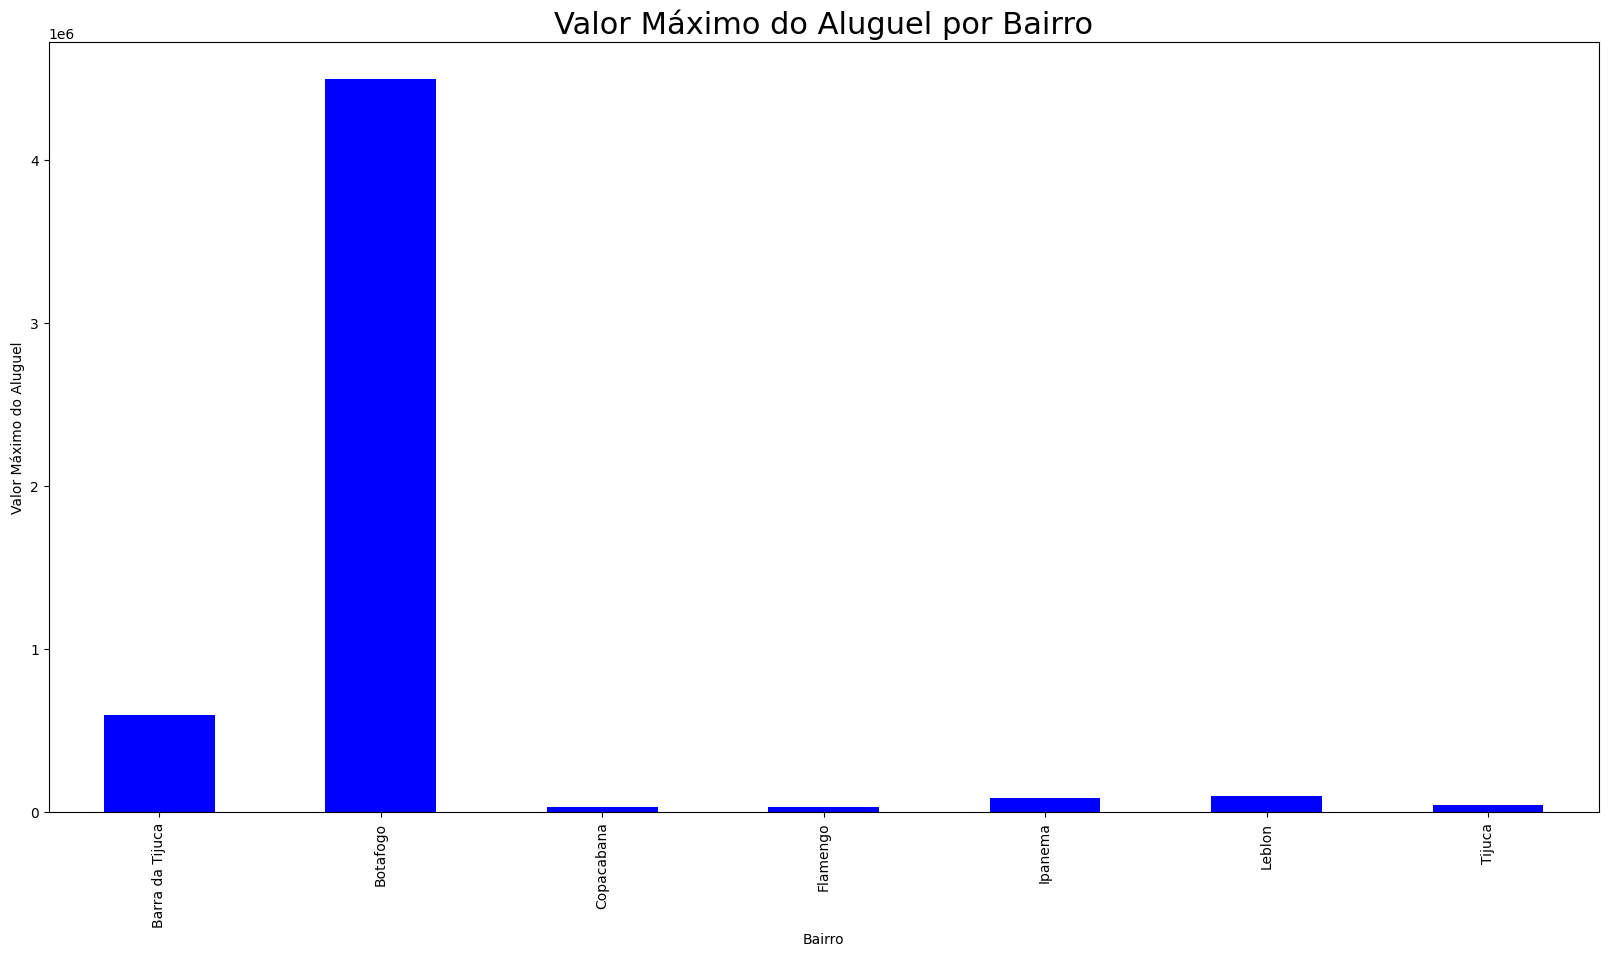

In [25]:
fig_media = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig_media.set_ylabel('Valor Máximo do Aluguel')
fig_media.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize':22})